In [1]:
import numpy as np
import tensorflow as tf
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
y1_true = tf.math.argmax(np.load('y1_true.npy'), axis=1).numpy()
y2_true = tf.math.argmax(np.load('y2_true.npy'), axis=1).numpy()
y1_pred = tf.math.argmax(np.load('y1_pred.npy'), axis=1).numpy()
y2_pred = tf.math.argmax(np.load('y2_pred.npy'), axis=1).numpy()

In [13]:
print(metrics.classification_report(y1_true, y1_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3105
           1       0.67      0.62      0.64       370
           2       0.75      0.83      0.79       999
           3       0.64      0.39      0.48       193
           4       0.70      0.55      0.62       295

    accuracy                           0.88      4962
   macro avg       0.74      0.68      0.70      4962
weighted avg       0.88      0.88      0.88      4962



In [14]:
print(metrics.classification_report(y2_true, y2_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      4626
           1       0.84      0.48      0.61       336

    accuracy                           0.96      4962
   macro avg       0.90      0.74      0.80      4962
weighted avg       0.96      0.96      0.95      4962



In [15]:
print(metrics.cohen_kappa_score(y1_true, y1_pred))

0.788459394899155


In [16]:
print(metrics.cohen_kappa_score(y2_true, y2_pred))

0.5936235402936756


In [3]:
y1_true = np.load('y1_true.npy').astype(np.float64)
y2_true = np.load('y2_true.npy').astype(np.float64)
y1_pred = np.load('y1_pred.npy').astype(np.float64)
y2_pred = np.load('y2_pred.npy').astype(np.float64)

In [18]:
print(metrics.log_loss(y1_true, y1_pred))

0.2954494242070998


In [19]:
print(metrics.log_loss(y2_true, y2_pred))

0.13256870398933704


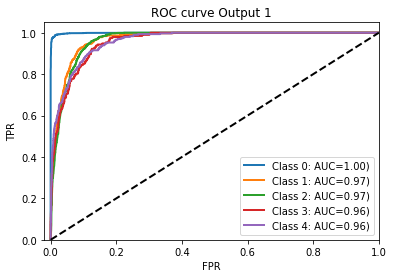

In [8]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = metrics.roc_curve(y1_true[:, i], y1_pred[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
for i in range(5):
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'Class {i}: AUC={roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve Output 1')
plt.legend(loc="lower right")
plt.savefig('roc_curve_t1.png')
plt.show()

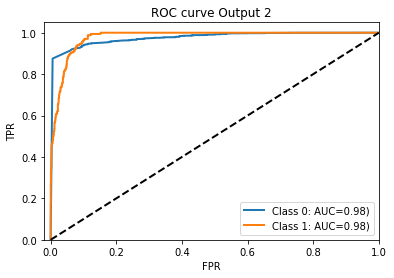

In [9]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = metrics.roc_curve(y2_true[:, i], y2_pred[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
for i in range(2):
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'Class {i}: AUC={roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve Output 2')
plt.legend(loc="lower right")
plt.savefig('roc_curve_t2.png')
plt.show()